#This is the first line of code on page 1

Created by: HMVE Combrink

*I used the R code that was provided in Word, and rewrote it in Python. The reson for this is so that I can use a .ipynb notebook to share the data easily as well as have control over the input data. If you want to load your own CSV, then let me know so that I can change the code accordingly*

*All the mathematics and content in this notebook was constructed from a paper titled The q-Exponential Social Discounting Functions of Gain and Loss*

The citation of the paper is:
**Takahashi, T., 2013. The q-exponential social discounting functions of gain and loss. https://www.scirp.org/pdf/AM_2013032115264492.pdf**

For more information on this notebook, feel free to contact HMVE Combrink

  



In [ ]:
#import all packages used in this notebook
import matplotlib.pyplot as plt
from google.colab import files as fl
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import numpy as np

#upload data in the form of a CSV
uploaddata = fl.upload()

Saving aggregate_ke_kh_kq_estimations_Final.csv to aggregate_ke_kh_kq_estimations_Final.csv


In [ ]:
#Read data into data frame, convert data to list
#replace this with the name of your uploaded csv
df = pd.read_csv("aggregate_ke_kh_kq_estimations_Final.csv")

#for this data we have 2 colums first is the delay, second is the value

delay = df['Social distance']
value = df['Giving']

In [ ]:
#To be able to combine all the data in the end

#Exponential
delay1 = df['Social distance']
value1 = df['Giving']

#Hyperbolic
delay2 = df['Social distance']
value2 = df['Giving']

#q-exponential
delay3 = df['Social distance']
value3 = df['Giving']

In [ ]:
#This section is a conceptual part of the model, and is based on direct communication with the author.
#Three models are defined
def exponential_model(delay, V, ke):
    return V * np.exp(-ke * delay)

def hyperbolic_model(delay, V, kh):
    return V / (1 + kh * delay)

def q_exponential_model(delay, V, k, q):
    return V / (1 + k * (1 - q) * delay)**(1 / (1 - q))
#All models need to be fit

# Fit EXPONENTIAL model
params_exponential, _ = curve_fit(exponential_model, delay1, value1, p0=[8000, 0.05])

# Fit HYPERBOLIC model
params_hyperbolic, _ = curve_fit(hyperbolic_model, delay2, value2, p0=[8000, 0.05])

# Fit Q-EXPONENTIAL model
params_q_exponential, _ = curve_fit(q_exponential_model, delay3, value3, p0=[8000, 0.03, -1.5])

# All results need to be printed, given the fit. Remember that all these numbers are based on the loaded csv
print("EXPONENTIAL")
print("Parameters (V, ke):", params_exponential)
print("AIC:", None)  # Calculate AIC

print("HYPERBOLIC")
print("Parameters (V, kh):", params_hyperbolic)
print("AIC:", None)  # Calculate AIC

print("Q-EXPONENTIAL")
print("Parameters (V, k, q):", params_q_exponential)
print("AIC:", None)  # Calculate AIC

EXPONENTIAL
Parameters (V, ke): [5.84476024e+01 5.45626525e-02]
AIC: None
HYPERBOLIC
Parameters (V, kh): [69.5323359   0.14114187]
AIC: None
Q-EXPONENTIAL
Parameters (V, k, q): [86.69334404  0.38281181 -0.79810387]
AIC: None


#Exponential Giving

*This is the mathematics from the paper and the emails in code*

\begin{equation}
V(t) = e^{-k t}
\end{equation}

Where:
\begin{align*}
V(t) & \text{ is the present value of a future reward at time } t, \\
k & \text{ is the discount rate, and} \\
t & \text{ is the time.}
\end{align*}

In [ ]:
#First, we define the exponential model function
def exponential_model(delay, ke, V=100):
    return V * np.exp(-ke * delay1)

#There is a need to define the initial guess for the parameter 'ke'. This is determined by the researcher/model etc.
initial_guess = [0.05]

# Fit the exponential model to the data using curve_fit. In Python there is a curve_fit function
params1, covariance = curve_fit(exponential_model, delay1, value1, p0=initial_guess)

# Extract the estimated 'ke' parameter. This is important for the exponential model
ke = params1[0]

# Print the result - a standard practice
print("Estimated ke:", ke)

# AIC needs to be calculated manually
n = len(value1)  # Number of data points
sse = np.sum((value1 - exponential_model(np.array(delay1), *params1))**2)  # Sum of squared errors. As this uses squared errors function
k = len(params1)  # Number of parameters in model
aic = n * np.log(sse / n) + 2 * k
print("AIC:", aic)

Estimated ke: 0.22965151359863445
AIC: 43.696253456744465


##Below is a plot of the graphs, with parameters so it can be customised

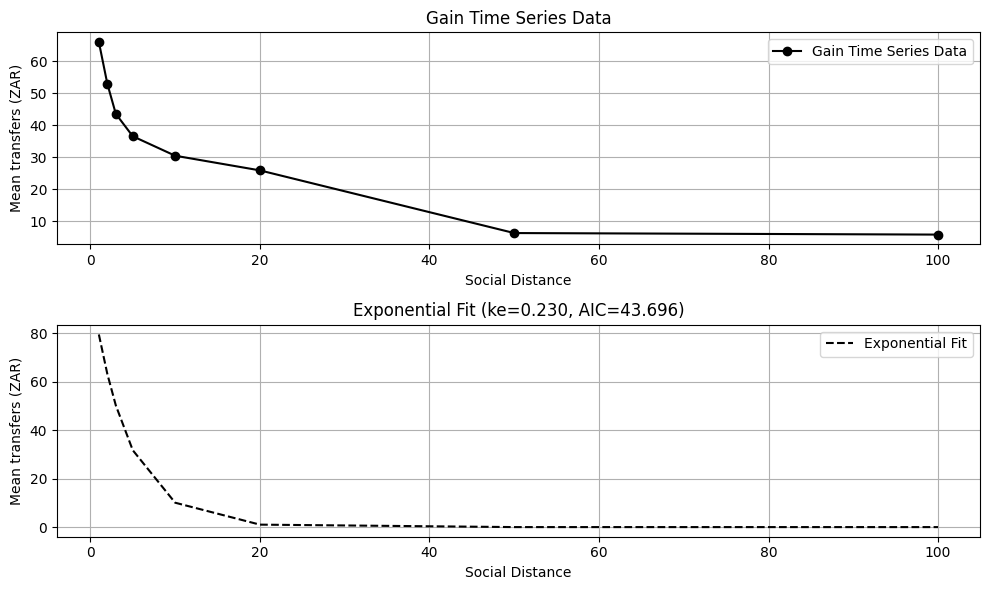

In [ ]:
#Plotting two figures

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(delay1, value1, label='Gain Time Series Data', marker='o', linestyle='-',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title('Gain Time Series Data')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(delay1, exponential_model(np.array(delay1), *params1), label='Exponential Fit', linestyle='--',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'Exponential Fit (ke={ke:.3f}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

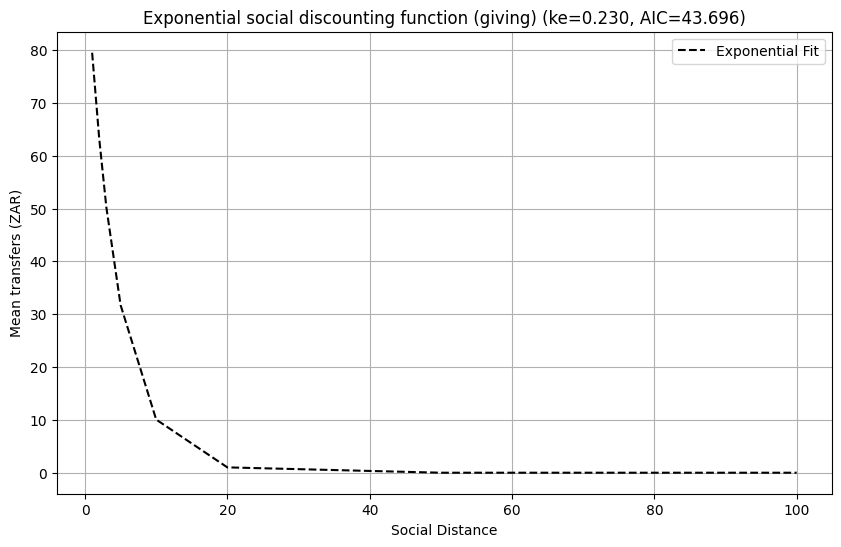

In [ ]:
#Plot a combined figure

plt.figure(figsize=(10, 6))

#plt.plot(delay1, value1, label='Gain Time Series Data', marker='o', linestyle='-', color='blue')
plt.plot(delay1, exponential_model(np.array(delay1), *params1), label='Exponential Fit', linestyle='--', color='black')

plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'Exponential social discounting function (giving) (ke={ke:.3f}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.show()

#Hyperbolic Giving
*This is the mathematics from the paper and the emails in code*

\begin{equation}
V(t) = \frac{1}{1 + kht}
\end{equation}

Where:
\begin{align*}
V(t) & \text{ is the present value of a future reward at time } t, \\
k & \text{ is the discount rate,} \\
h & \text{ is the hyperbolic discounting parameter, and} \\
t & \text{ is the time.}
\end{align*}

In [ ]:
# Second, we define the hyperbolic model function
def hyperbolic_model(delay2, kh, V=100):
    return V / (1 + kh * delay2)

# Initial guess for the parameter 'kh'- which is what the Hyperbolic model uses
initial_guess = [0.05]

# Fit the hyperbolic model to the data using curve_fit - the same Python package
params2, covariance = curve_fit(hyperbolic_model, delay2, value2, p0=initial_guess)

# Extract the estimated 'kh' parameter
kh = params2[0]

# Print the result
print("Estimated kh:", kh)

# Calculate AIC manually
n = len(value2)  # Number of data points in csv
sse = np.sum((value2 - hyperbolic_model(np.array(delay2), *params2))**2)  # Sum of squared errors
k = len(params2)  # Number of parameters in csv
aic = n * np.log(sse / n) + 2 * k
print("AIC:", aic)

Estimated kh: 0.3679828039721852
AIC: 32.88358148687138


##Below is a plot of the graphs, with parameters so it can be customised

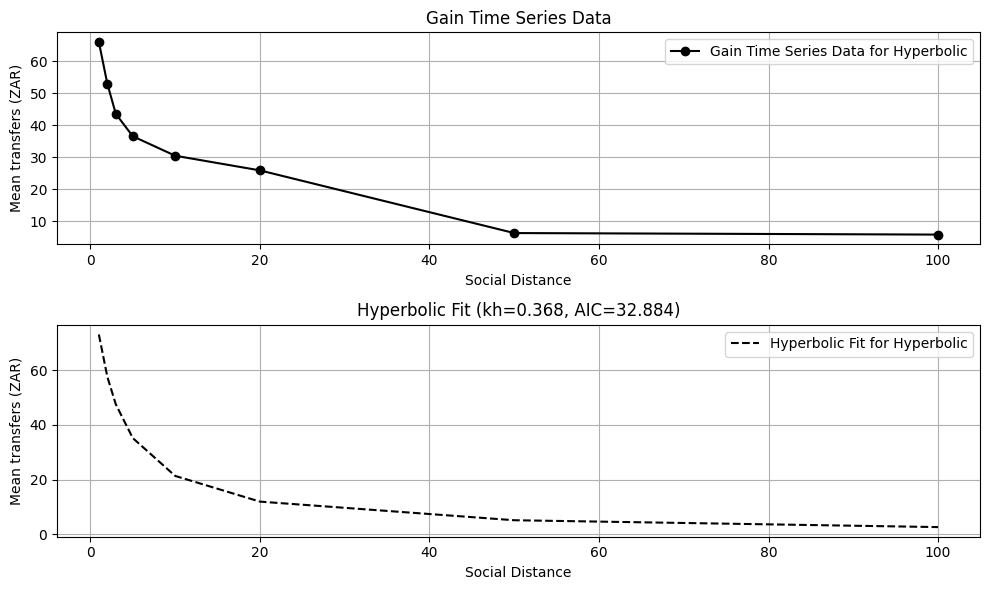

In [ ]:
#Plot 2 graphs

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(delay2, value2, label='Gain Time Series Data for Hyperbolic', marker='o', linestyle='-',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title('Gain Time Series Data')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(delay2, hyperbolic_model(np.array(delay2), *params2), label='Hyperbolic Fit for Hyperbolic', linestyle='--',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'Hyperbolic Fit (kh={kh:.3f}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

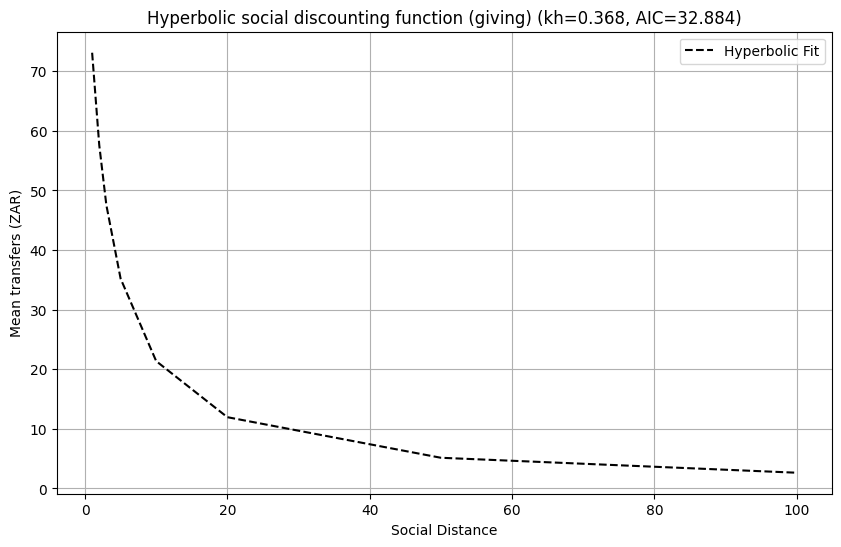

In [ ]:
#Plot one combined graph

plt.figure(figsize=(10, 6))

#plt.plot(delay2, value2, label='Gain Time Series Data', marker='o', linestyle='-', color='blue')
plt.plot(delay2, hyperbolic_model(np.array(delay2), *params2), label='Hyperbolic Fit', linestyle='--', color='black')

plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'Hyperbolic social discounting function (giving) (kh={kh:.3f}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.show()

#q-Exponential Giving
*This is the mathematics from the paper and the emails in code*

\begin{equation}
V(t) = \frac{1}{(1 + k(1 - q)t)^{\frac{1}{1 - q}}}
\end{equation}

Where:
\begin{align*}
V(t) & \text{ is the present value of a future reward at time } t, \\
k & \text{ is the discount rate,} \\
q & \text{ is the social discounting parameter, and} \\
t & \text{ is the time.}
\end{align*}

In [ ]:
# Lastly, we define the q-exponential model function. This function uses three criteria
def q_exponential_model(delay3, k, q, V=100):
    return V / (1 + k * (1 - q) * delay3)**(1 / (1 - q))

# Initial guess for the parameters 'k' and 'q'
initial_guess = [0.005, 0.5]

# Fit the q-exponential model to the data using curve_fit
params3, covariance = curve_fit(q_exponential_model, delay3, value3, p0=initial_guess)

# Extract the estimated 'k' and 'q' parameters - unline the previus two models, here we specify k and q
k, q = params3

# Print the results
print("Estimated k:", k)
print("Estimated q:", q)

# Calculate AIC manually
n = len(value3)  # Number of data points
sse = np.sum((value3 - q_exponential_model(np.array(delay3), *params3))**2)  # Sum of squared errors
#k = len(params3)  # Number of parameters
aic = n * np.log(sse / n) + 2 * k
print("AIC:", aic)

Estimated k: 0.6352911538500408
Estimated q: -1.0082702430258401
AIC: 21.805993769717727


In [ ]:
# Lastly, we define the q-exponential model function. This function uses three criteria
def q_exponential_model(delay3, k, q, V=100):
    return V / (1 + k * (1 - q) * delay3)**(1 / (1 - q))

# Initial guess for the parameters 'k' and 'q'
initial_guess1 = [0.005, 0.5]

# Fit the q-exponential model to the data using curve_fit
params3, covariance = curve_fit(q_exponential_model, delay3, value3, p0=initial_guess1)

# Extract the estimated 'k' and 'q' parameters - unline the previus two models, here we specify k and q
k, q = params3

# Print the results
print("Estimated k:", k)
print("Estimated q:", q)

# Calculate AIC manually
n = len(value3)  # Number of data points
sse = np.sum((value3 - q_exponential_model(np.array(delay3), *params3))**2)  # Sum of squared errors
#k = len(params6)  # Number of parameters
aic = n * np.log(sse / n) + 2 * k
print("AIC:", aic)

Estimated k: 0.6352911538500408
Estimated q: -1.0082702430258401
AIC: 21.805993769717727


##Below is a plot of the graphs, with parameters so it can be customised

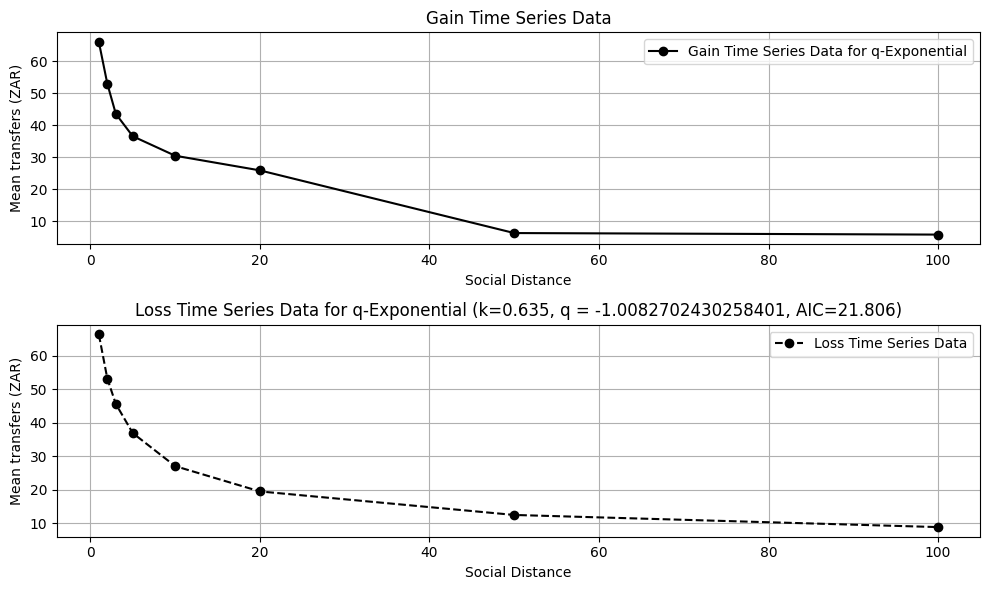

In [ ]:
#Plot 2 graphs
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(delay3, value3, label='Gain Time Series Data for q-Exponential', marker='o', linestyle='-',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title('Gain Time Series Data')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
loss_values = [q_exponential_model(d, *params3) for d in delay3]
plt.plot(delay3, loss_values, label='Loss Time Series Data', marker='o', linestyle='--',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'Loss Time Series Data for q-Exponential (k={k:.3f}, q = {q}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

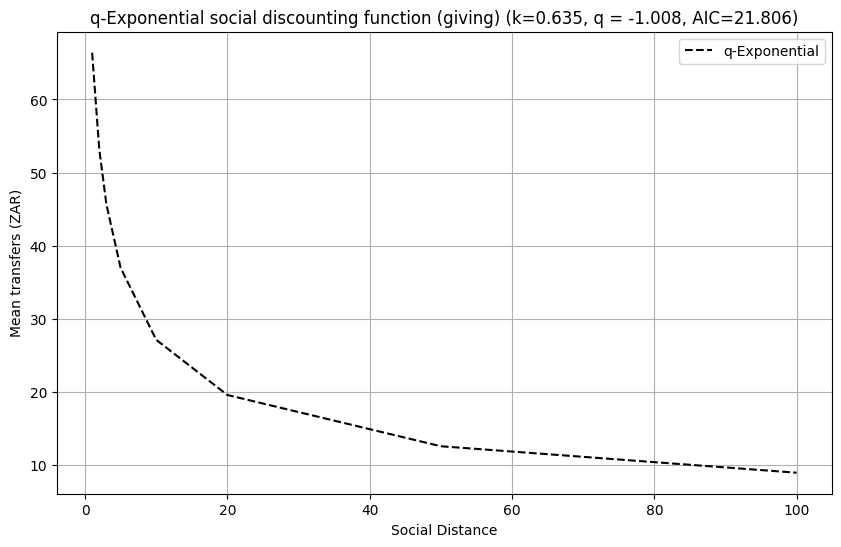

In [ ]:
#Plot gain and loss on one graph
plt.figure(figsize=(10, 6))

#plt.plot(delay, value, label='Gain Time Series Data', marker='o', linestyle='-', color='blue')
loss_values3 = [q_exponential_model(d, *params3) for d in delay]
plt.plot(delay3, loss_values, label='q-Exponential', linestyle='--', color='black')
q_rounded = round(q, 3)
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'q-Exponential social discounting function (giving) (k={k:.3f}, q = {q_rounded}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.show()

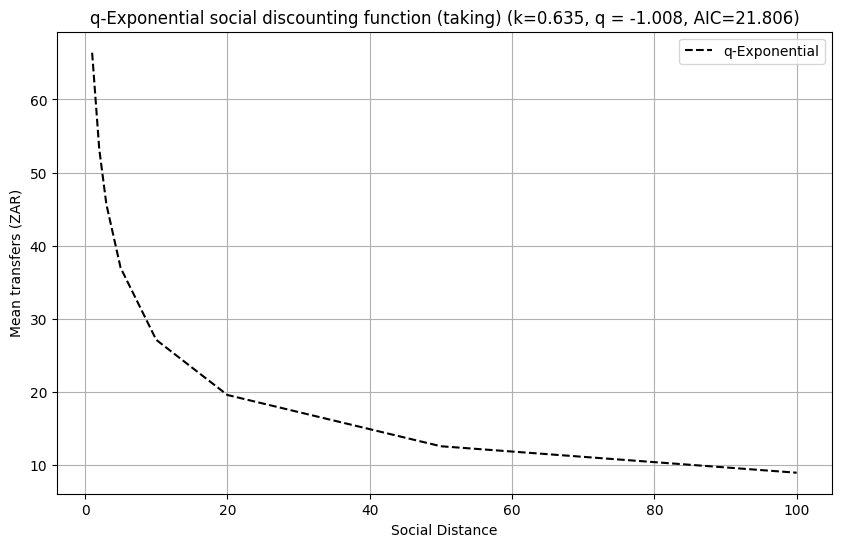

In [ ]:
#Plot gain and loss on one graph
plt.figure(figsize=(10, 6))

#plt.plot(delay, value, label='Gain Time Series Data', marker='o', linestyle='-', color='black')
loss_values3 = [q_exponential_model(d, *params3) for d in delay3]
loss_values_rounded1 = [round(val, 3) for val in loss_values]
q_rounded3 = round(q, 3)
plt.plot(delay3, loss_values_rounded1, label='q-Exponential', linestyle='--', color='black')

plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'q-Exponential social discounting function (taking) (k={k:.3f}, q = {q_rounded3}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.show()

#Graphs for Taking

*One set of graphs were specific for Giving, the others, Taking*

In [ ]:
#To be able to combine all the data in the end

#Exponential
delay4 = df['Social distance']
value4 = df['Taking']

#Hyperbolic
delay5 = df['Social distance']
value5 = df['Taking']

#q-exponential
delay6 = df['Social distance']
value6 = df['Taking']

#Exponential Taking

*This is the mathematics from the paper and the emails in code*

\begin{equation}
V(t) = e^{-k t}
\end{equation}

Where:
\begin{align*}
V(t) & \text{ is the present value of a future reward at time } t, \\
k & \text{ is the discount rate, and} \\
t & \text{ is the time.}
\end{align*}

In [ ]:
#First, we define the exponential model function
def exponential_model(delay4, ke, V=100):
    return V * np.exp(-ke * delay4)

#There is a need to define the initial guess for the parameter 'ke'. This is determined by the researcher/model etc.
initial_guess = [0.05]

# Fit the exponential model to the data using curve_fit. In Python there is a curve_fit function
params4, covariance = curve_fit(exponential_model, delay4, value4, p0=initial_guess)

# Extract the estimated 'ke' parameter. This is important for the exponential model
ke = params4[0]

# Print the result - a standard practice
print("Estimated ke:", ke)

# AIC needs to be calculated manually
n = len(value4)  # Number of data points
sse = np.sum((value4 - exponential_model(np.array(delay1), *params4))**2)  # Sum of squared errors. As this uses squared errors function
k = len(params1)  # Number of parameters in model
aic = n * np.log(sse / n) + 2 * k
print("AIC:", aic)

Estimated ke: 0.13922553030998996
AIC: 44.19847950947413


##Below is a plot of the graphs, with parameters so it can be customised

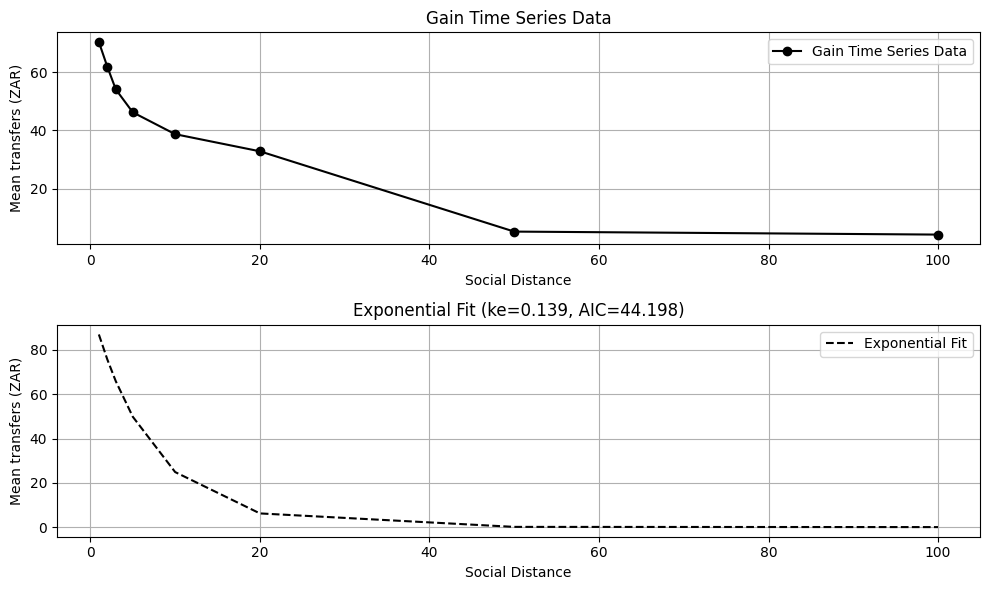

In [ ]:
#Plotting two figures

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(delay4, value4, label='Gain Time Series Data', marker='o', linestyle='-',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title('Gain Time Series Data')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(delay4, exponential_model(np.array(delay4), *params4), label='Exponential Fit', linestyle='--',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'Exponential Fit (ke={ke:.3f}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

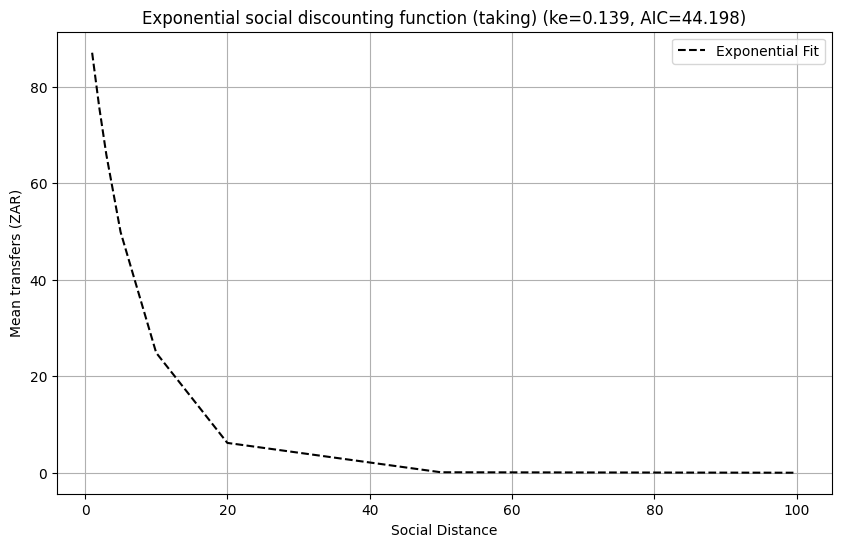

In [ ]:
#Plot a combined figure

plt.figure(figsize=(10, 6))

#plt.plot(delay1, value1, label='Gain Time Series Data', marker='o', linestyle='-', color='blue')
plt.plot(delay4, exponential_model(np.array(delay4), *params4), label='Exponential Fit', linestyle='--', color='black')

plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'Exponential social discounting function (taking) (ke={ke:.3f}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.show()

#Hyperbolic Taking
*This is the mathematics from the paper and the emails in code*

\begin{equation}
V(t) = \frac{1}{1 + kht}
\end{equation}

Where:
\begin{align*}
V(t) & \text{ is the present value of a future reward at time } t, \\
k & \text{ is the discount rate,} \\
h & \text{ is the hyperbolic discounting parameter, and} \\
t & \text{ is the time.}
\end{align*}

In [ ]:
# Second, we define the hyperbolic model function
def hyperbolic_model(delay5, kh, V=100):
    return V / (1 + kh * delay5)

# Initial guess for the parameter 'kh'- which is what the Hyperbolic model uses
initial_guess = [0.05]

# Fit the hyperbolic model to the data using curve_fit - the same Python package
params5, covariance = curve_fit(hyperbolic_model, delay5, value5, p0=initial_guess)

# Extract the estimated 'kh' parameter
kh = params5[0]

# Print the result
print("Estimated kh:", kh)

# Calculate AIC manually
n = len(value5)  # Number of data points in csv
sse = np.sum((value5 - hyperbolic_model(np.array(delay5), *params5))**2)  # Sum of squared errors
k = len(params5)  # Number of parameters in csv
aic = n * np.log(sse / n) + 2 * k
print("AIC:", aic)

Estimated kh: 0.23630407756528896
AIC: 34.89718461364585


##Below is a plot of the graphs, with parameters so it can be customised

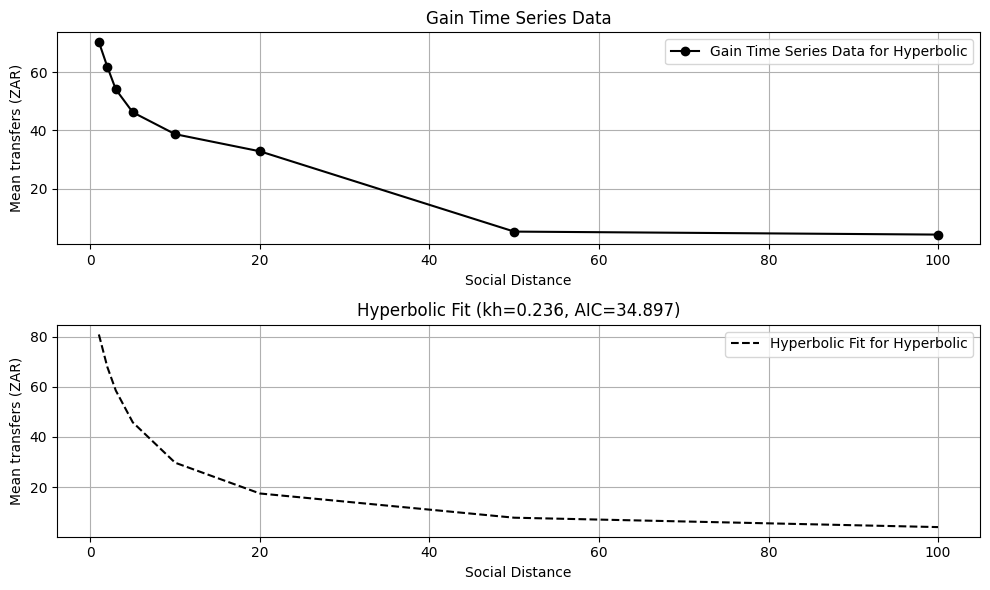

In [ ]:
#Plot 2 graphs

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(delay5, value5, label='Gain Time Series Data for Hyperbolic', marker='o', linestyle='-',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title('Gain Time Series Data')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(delay5, hyperbolic_model(np.array(delay5), *params5), label='Hyperbolic Fit for Hyperbolic', linestyle='--',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'Hyperbolic Fit (kh={kh:.3f}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

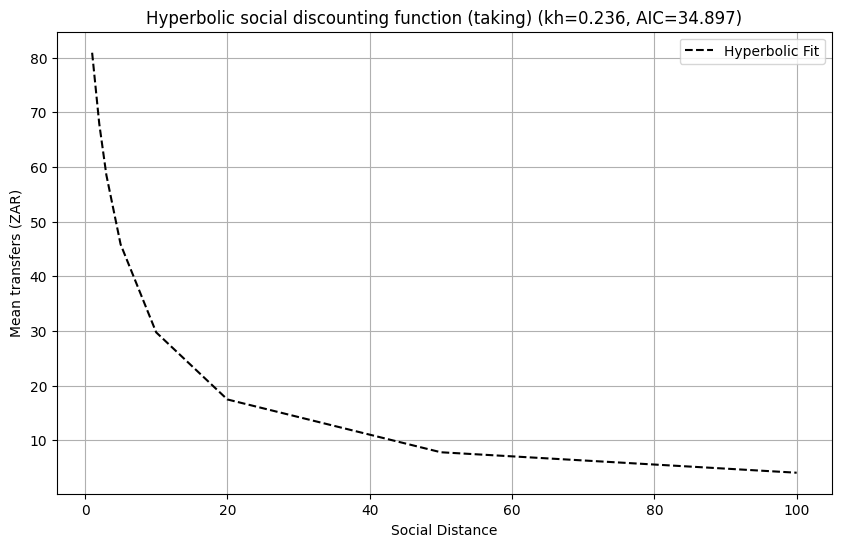

In [ ]:
#Plot one combined graph

plt.figure(figsize=(10, 6))

#plt.plot(delay2, value2, label='Gain Time Series Data', marker='o', linestyle='-', color='blue')
plt.plot(delay5, hyperbolic_model(np.array(delay5), *params5), label='Hyperbolic Fit', linestyle='--', color='black')

plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'Hyperbolic social discounting function (taking) (kh={kh:.3f}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.show()

#q-Exponential Taking
*This is the mathematics from the paper and the emails in code*

\begin{equation}
V(t) = \frac{1}{(1 + k(1 - q)t)^{\frac{1}{1 - q}}}
\end{equation}

Where:
\begin{align*}
V(t) & \text{ is the present value of a future reward at time } t, \\
k & \text{ is the discount rate,} \\
q & \text{ is the social discounting parameter, and} \\
t & \text{ is the time.}
\end{align*}

In [ ]:
# Lastly, we define the q-exponential model function. This function uses three criteria
def q_exponential_model(delay6, k, q, V=100):
    return V / (1 + k * (1 - q) * delay6)**(1 / (1 - q))

# Initial guess for the parameters 'k' and 'q'
initial_guess = [0.005, 0.5]

# Fit the q-exponential model to the data using curve_fit
params6, covariance = curve_fit(q_exponential_model, delay6, value6, p0=initial_guess)

# Extract the estimated 'k' and 'q' parameters - unline the previus two models, here we specify k and q
k, q = params6

# Print the results
print("Estimated k:", k)
print("Estimated q:", q)

# Calculate AIC manually
n = len(value6)  # Number of data points
sse = np.sum((value6 - q_exponential_model(np.array(delay6), *params6))**2)  # Sum of squared errors
#k = len(params6)  # Number of parameters
aic = n * np.log(sse / n) + 2 * k
print("AIC:", aic)

Estimated k: 0.03541093578358567
Estimated q: 1.2823982888303647
AIC: 52.19451702974953


##Below is a plot of the graphs, with parameters so it can be customised

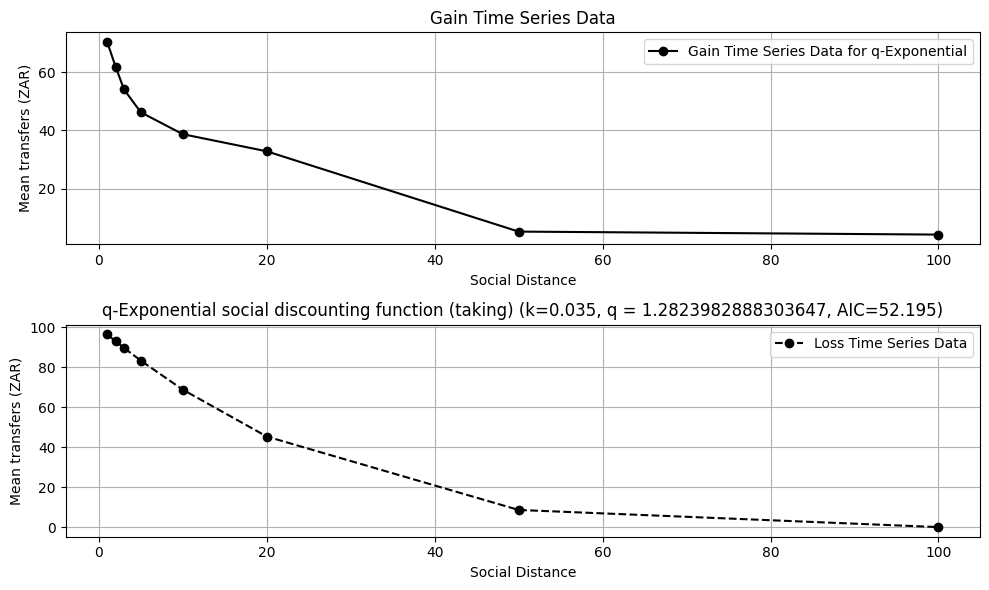

In [ ]:
#Plot 2 graphs
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(delay6, value6, label='Gain Time Series Data for q-Exponential', marker='o', linestyle='-',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title('Gain Time Series Data')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
loss_values = [q_exponential_model(d, *params6) for d in delay6]
plt.plot(delay6, loss_values, label='Loss Time Series Data', marker='o', linestyle='--',color='black')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'q-Exponential social discounting function (taking) (k={k:.3f}, q = {q}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

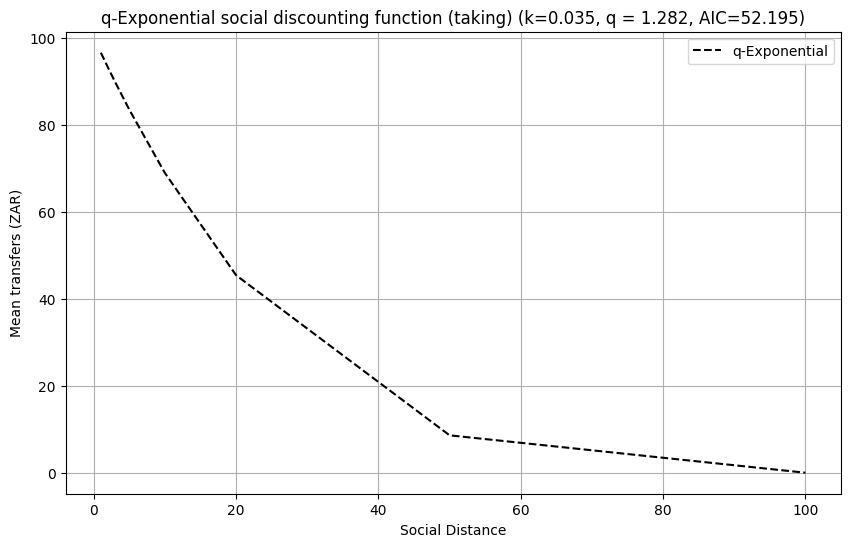

In [ ]:
#Plot gain and loss on one graph
plt.figure(figsize=(10, 6))

#plt.plot(delay, value, label='Gain Time Series Data', marker='o', linestyle='-', color='black')
loss_values3 = [q_exponential_model(d, *params6) for d in delay6]
loss_values_rounded6 = [round(val, 3) for val in loss_values]
q_rounded3 = round(q, 3)
plt.plot(delay6, loss_values_rounded6, label='q-Exponential', linestyle='--', color='black')

plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'q-Exponential social discounting function (taking) (k={k:.3f}, q = {q_rounded3}, AIC={aic:.3f})')
plt.grid(True)
plt.legend()

plt.show()

#Combining Graphs

These graphs combine previous context

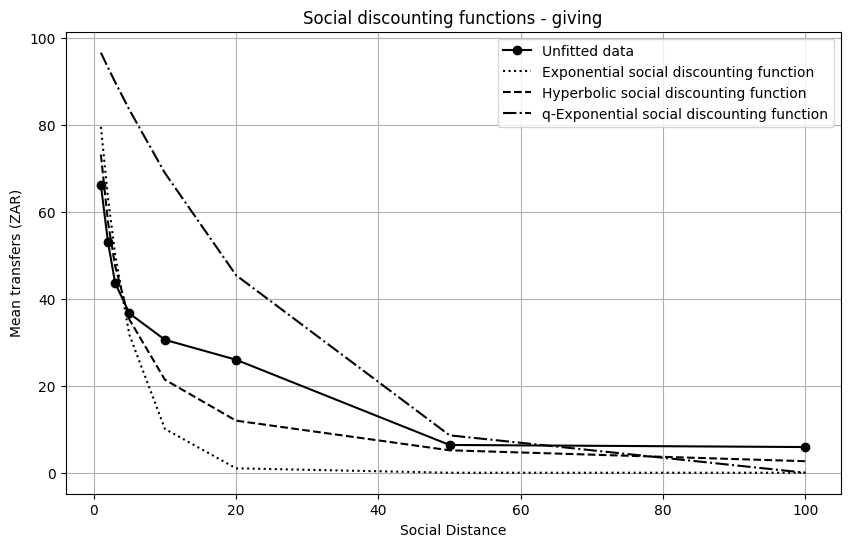

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(delay1, value1, label='Unfitted data', marker='o', linestyle='-', color='black')
plt.plot(delay1, exponential_model(np.array(delay1), *params1), label='Exponential social discounting function', linestyle=':', color='black')
plt.plot(delay2, hyperbolic_model(np.array(delay2), *params2), label='Hyperbolic social discounting function', linestyle='--', color='black')
plt.plot(delay3, loss_values3, label='q-Exponential social discounting function', linestyle='dashdot', color='black')

plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title('Social discounting functions - giving')
plt.grid(True)
plt.legend()

plt.show()

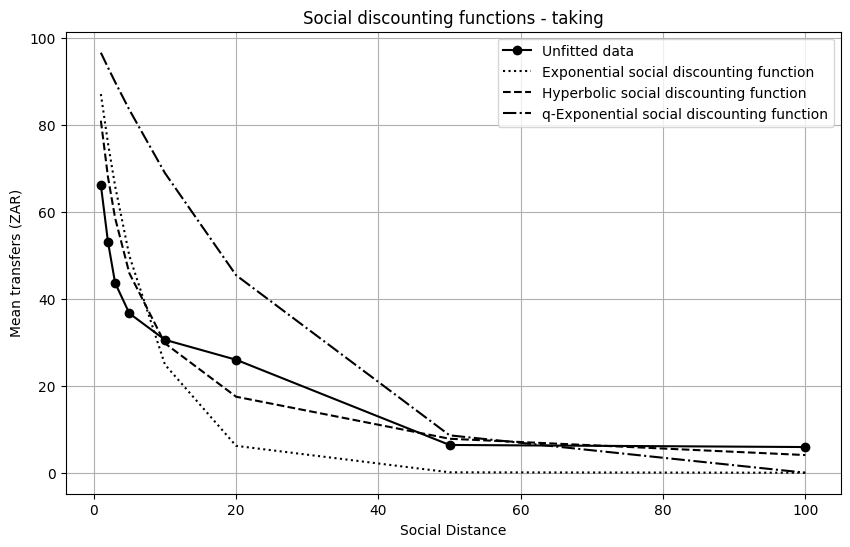

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(delay1, value1, label='Unfitted data', marker='o', linestyle='-', color='black')
plt.plot(delay4, exponential_model(np.array(delay4), *params4), label='Exponential social discounting function', linestyle=':', color='black')
plt.plot(delay5, hyperbolic_model(np.array(delay5), *params5), label='Hyperbolic social discounting function', linestyle='--', color='black')
plt.plot(delay6, loss_values3, label='q-Exponential social discounting function', linestyle='dashdot', color='black')

plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title('Social discounting functions - taking')
plt.grid(True)
plt.legend()

plt.show()

Estimated ke: 0.13922553030998996
AIC: 46.63976888017654


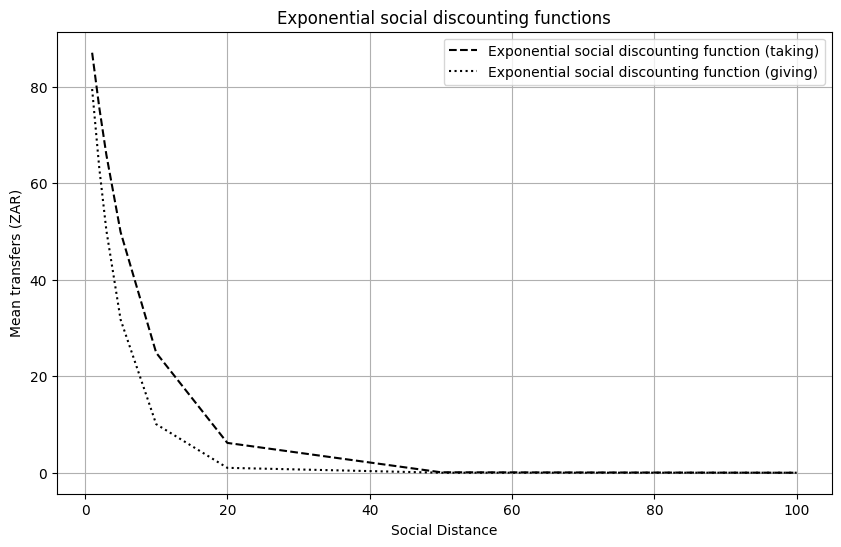

In [ ]:
#First, we define the exponential model function
def exponential_model2(delay4, ke, V=100):
    return V * np.exp(-ke * delay4)

#There is a need to define the initial guess for the parameter 'ke'. This is determined by the researcher/model etc.
initial_guess = [0.05]

# Fit the exponential model to the data using curve_fit. In Python there is a curve_fit function
params4, covariance = curve_fit(exponential_model2, delay4, value4, p0=initial_guess)

# Extract the estimated 'ke' parameter. This is important for the exponential model
ke = params4[0]

# Print the result - a standard practice
print("Estimated ke:", ke)

# AIC needs to be calculated manually
n = len(value4)  # Number of data points
sse = np.sum((value1 - exponential_model2(np.array(delay4), *params4))**2)  # Sum of squared errors. As this uses squared errors function
k = len(params4)  # Number of parameters in model
aic = n * np.log(sse / n) + 2 * k
print("AIC:", aic)
#Plot a combined figure

plt.figure(figsize=(10, 6))

#plt.plot(delay4, value1, label='Gain Time Series Data', marker='o', linestyle='-', color='blue')
plt.plot(delay4, exponential_model2(np.array(delay4), *params4), label='Exponential social discounting function (taking)', linestyle='--', color='black')
plt.plot(delay1, exponential_model(np.array(delay1), *params1), label='Exponential social discounting function (giving)', linestyle=':', color='black')

plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'Exponential social discounting functions')
plt.grid(True)
plt.legend()

plt.show()

Estimated kh: 0.3679828039721852
AIC: 40.03008545349408


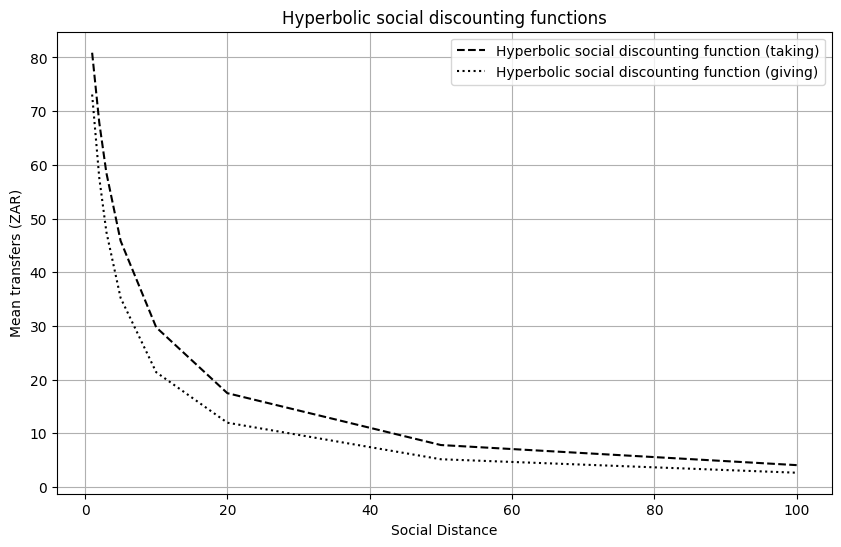

In [ ]:
# Second, we define the hyperbolic model function
def hyperbolic_model2(delay5, kh, V=100):
    return V / (1 + kh * delay5)

# Initial guess for the parameter 'kh'- which is what the Hyperbolic model uses
initial_guess = [0.05]

# Fit the hyperbolic model to the data using curve_fit - the same Python package
params5, covariance = curve_fit(hyperbolic_model2, delay5, value5, p0=initial_guess)

# Extract the estimated 'kh' parameter
kh = params2[0]

# Print the result
print("Estimated kh:", kh)

# Calculate AIC manually
n = len(value5)  # Number of data points in csv
sse = np.sum((value5 - hyperbolic_model2(np.array(delay5), *params2))**2)  # Sum of squared errors
k = len(params2)  # Number of parameters in csv
aic = n * np.log(sse / n) + 2 * k
print("AIC:", aic)

#plt.plot(delay5, value1, label='Gain Time Series Data', marker='o', linestyle='-', color='blue')
plt.figure(figsize=(10, 6))
plt.plot(delay5, hyperbolic_model2(np.array(delay5), *params5), label='Hyperbolic social discounting function (taking)', linestyle='--', color='black')
plt.plot(delay2, hyperbolic_model(np.array(delay2), *params2), label='Hyperbolic social discounting function (giving)', linestyle=':', color='black')

plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'Hyperbolic social discounting functions')
plt.grid(True)
plt.legend()

plt.show()

Estimated k: 0.03541093578358567
Estimated q: 1.2823982888303647
AIC: 52.19451702974953


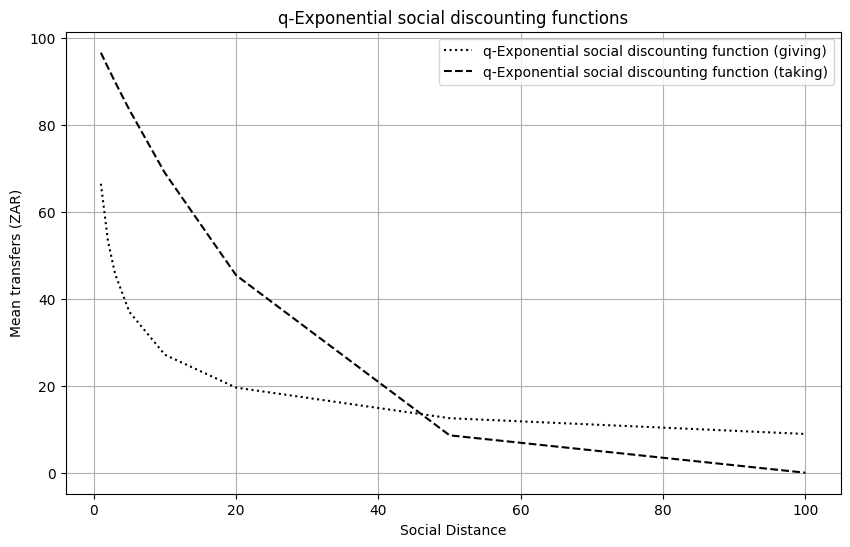

In [ ]:
# Lastly, we define the q-exponential model function. This function uses three criteria
def q_exponential_model2(delay6, k, q, V=100):
    return V / (1 + k * (1 - q) * delay6)**(1 / (1 - q))

# Initial guess for the parameters 'k' and 'q'
initial_guess = [0.005, 0.5]

# Fit the q-exponential model to the data using curve_fit
params6, covariance = curve_fit(q_exponential_model2, delay6, value6, p0=initial_guess)

# Extract the estimated 'k' and 'q' parameters - unline the previus two models, here we specify k and q
k, q = params6

# Print the results
print("Estimated k:", k)
print("Estimated q:", q)

# Calculate AIC manually
n = len(value6)  # Number of data points
sse = np.sum((value6 - q_exponential_model2(np.array(delay6), *params6))**2)  # Sum of squared errors
#k = len(params6)  # Number of parameters
aic = n * np.log(sse / n) + 2 * k
print("AIC:", aic)

plt.figure(figsize=(10, 6))

#plt.plot(delay, value, label='Gain Time Series Data', marker='o', linestyle='-', color='blue')
loss_values3 = [q_exponential_model(d, *params3) for d in delay1]
plt.plot(delay3, loss_values3, label='q-Exponential social discounting function (giving)', linestyle=':', color='black')
loss_values6 = [q_exponential_model2(d, *params6) for d in delay6]
plt.plot(delay6, loss_values6, label='q-Exponential social discounting function (taking)', linestyle='--', color='black')

#plt.plot(delay3, loss_values3, label='q-Exponential Giving', linestyle='--', color='red')
plt.xlabel('Social Distance')
plt.ylabel('Mean transfers (ZAR)')
plt.title(f'q-Exponential social discounting functions')
plt.grid(True)
plt.legend()

plt.show()